In [ ]:
!nvidia-smi

Mon Sep 21 10:32:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_labels[0]

5

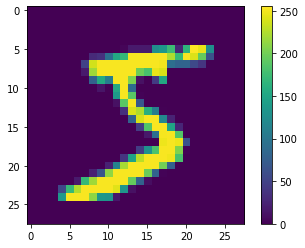

In [ ]:
plt.figure()
plt.imshow(train_images[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

이미지 전처리
Flatten, Normalize(Scailing), Onehanit

In [ ]:
train_images[0].shape

(28, 28)

### DNN에서는.. 2D를 1D로
(28, 28) = > (28 * 28) => (784)

### CNN에서는.. 채널 축이 추가
(H, W, C) = > (28, 28, 1)

In [ ]:
# 각각 스케일링과 노말라이즈

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
# feature expression
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        activation='relu'))
# classification module
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
# output layer
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

두번째 CONV PARAM 개수
w : 9 * 32 * 64 b : 
(채널 * 필터그룹 개수)

분류에서 loss function
-categorical_crossentropy : 
-sparse_ categorical_crossentropy :

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 7s 9ms/step - loss: 0.1976 - accuracy: 0.9379 - val_loss: 0.0666 - val_accuracy: 0.9804
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.0409 - val_accuracy: 0.9883
Epoch 3/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0456 - val_accuracy: 0.9873
Epoch 5/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.0489 - val_accuracy: 0.9874
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.0408 - val_accuracy: 0.9889
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0357 - val_accuracy: 0.9914
Epoch 

In [ ]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1121 - accuracy: 0.9918


In [ ]:
import numpy as np

In [ ]:
test_images[0].shape

(28, 28, 1)

In [ ]:
# 맨 앞 1은 batch size
predict = model.predict(test_images[0].reshape(1, 28, 28, 1))
print(predict)
print(np.argmax(predict))

[[2.3026405e-38 2.5701563e-36 3.6833076e-28 2.0302132e-31 0.0000000e+00
  5.2875224e-34 0.0000000e+00 1.0000000e+00 8.5876511e-31 2.5282107e-25]]
7
